# Computer Vision Deep Learning

The codes behind CV is a lot like multiclass classification. We encode the picture into tensors for the computer to understand, and it churns out the **probabailities** of what the photo is (but we need to do labelling of data on the photos first)

CNN layer is a good algorithm to learn from images, as the window convolves through each pixel-turned-tensor-data, and try to learn patterns from the images.

## Frameworks to run

In [28]:
#deep learning
import torch
from torch import nn

#computer viz
import torchvision 
from torchvision import datasets
from torchvision import transforms 
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from helper_functions import plot_decision_boundary
from sklearn.datasets import make_blobs

from tqdm.auto import tqdm

from timeit import default_timer as timer


In [2]:
train_data = datasets.FashionMNIST(
    root='data', #where to download data to? 
    train=True,  #do we want the training dataset?
    download=True, #download it?
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)


test_data = datasets.FashionMNIST(
    root='data', #where to download data to? 
    train=False,  #do we want the training dataset?
    download=True, #download it?
    transform=ToTensor(), #how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)

In [3]:
len(train_data)

60000

In [4]:
#see the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
#it's a 9! which relates to an ankle boot
image_with_labels = train_data.class_to_idx
image_with_labels

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

torch.Size([1, 28, 28])


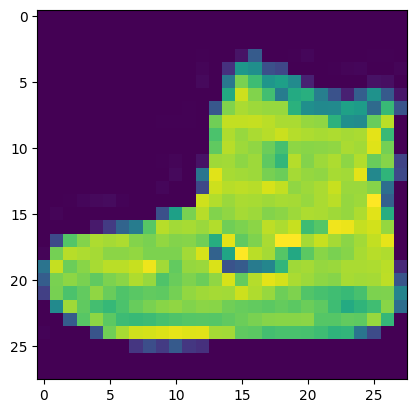

In [6]:
#28 pixels across, 28 pixels down. not very high definition
print(train_data[0][0].shape)
image, label = train_data[0]
plt.imshow(image.squeeze())

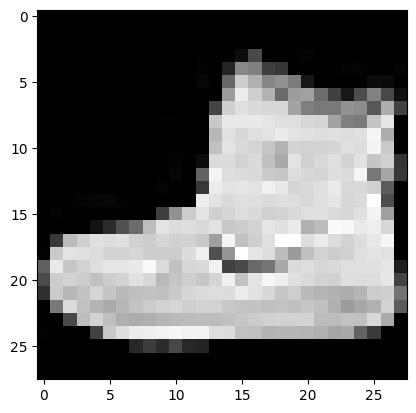

In [7]:
#grayscale
plt.imshow(image.squeeze(), cmap='gray')

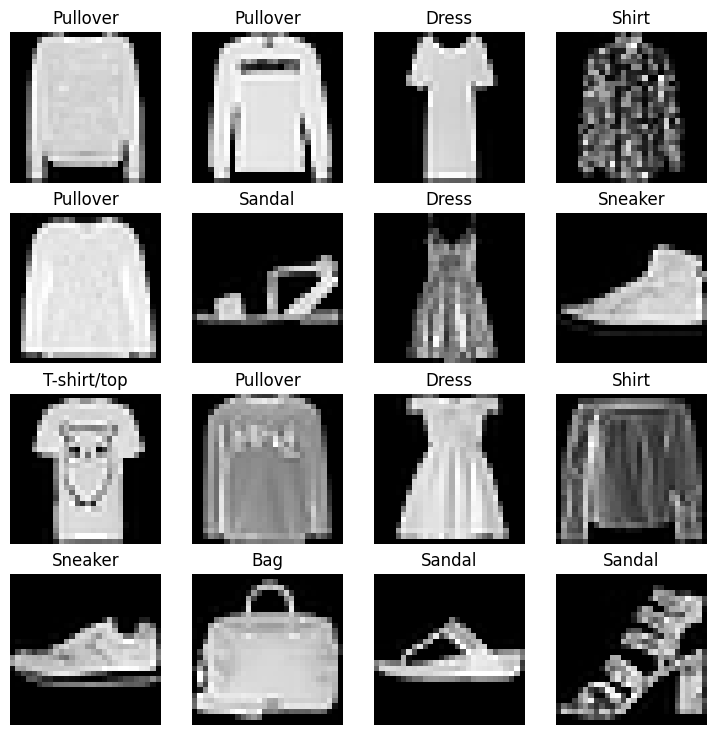

In [8]:
#visualizing more images. 
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx] #img returns a tensor value, which is a representation of an image but with numbers
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis(False)

### Dataloading

1. More computationally efficient, computing hardware may not be able to look at all the data (maybe 60000) at once
2. Gives our NN more chance to update gradients per epoch

In [9]:
#batch sizes for faster processing
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=32, #
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [10]:
  my_list = [1, 2, 3, 4, 5]
my_iterator = iter(my_list)
next(my_iterator)
next(my_iterator)

2

In [11]:
#check whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

#we should have batchs size = 32

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Trouser')

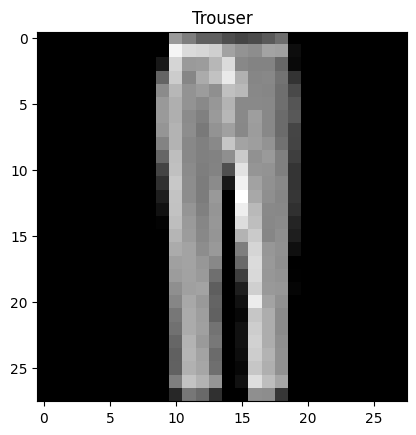

In [12]:
#show the 2nd sample
img, label = train_features_batch[3], train_labels_batch[3]
plt.imshow(img.squeeze(), #removing one dimension
           cmap='gray')
plt.title(train_data.classes[label])

## Let's build our model!

When statrting to build a series of mahcine learning modelling experiments, it's best practive to start with a baseline model, and then improve on it with subsequent features.

AKA. start simply, add complexity when necessary

In [13]:
#Create a flatten layer

flatten_model = nn.Flatten()

x = train_features_batch[0]

output =  flatten_model(x) #perform forward pass

#Print out what happened
print(f'shape before: {x.shape}') #[color channel, height width]
print(f'shape after: {output.shape}') #[color channel, height*width]

shape before: torch.Size([1, 28, 28])
shape after: torch.Size([1, 784])


In [14]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.2196,
         0.2902, 0.6588, 0.8118, 0.6353, 0.7843, 0.7608, 0.6902, 0.9098, 0.6627,
         0.2745, 0.2118, 0.0353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0431, 0.4471, 0.5490,
         0.4980, 0.3922, 0.3451, 0.5647, 0.7490, 0.9961, 0.9804, 0.7686, 0.6078,
         0.3373, 0.3725, 0.4863, 0.5294, 0.4588, 0.0471, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5529, 0.4196,
         0.3216, 0.3059, 0.3451, 0.3294, 0.2510, 0.2118, 0.1255, 0.1569, 0.2078,
         0.2235, 0.3059, 0.3294, 0.3098, 0.3294, 0.4196, 0.5647, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1412, 0.4118,
         0.3098, 0.3373, 0.3294, 0.3216, 0.3294, 0.3490, 0.3373, 0.3333, 0.3333,
         0.3216, 0.3176, 0.3216, 0.3098, 0.3059, 0.3098, 0.3020, 0.4118, 0.1412,
         0.0000, 0.0000, 0.0

In [15]:
from torch import nn

class FashionMNISTModel(nn.Module):
    def __init__ (self, input, output, hidden_units):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), #we need this layer, so that our 2D tensor can trained as a 1D vector.
            nn.Linear(in_features=input, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [16]:
#setup our model
model = FashionMNISTModel(input = 784, # 28*28 for training purposes
                         output = 10, # outputs one for each class
                         hidden_units= 10) # units for training 
model 

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,28,28]) #this is the tensor we need to feed into our model. it is common to have an error here
model(dummy_x)

tensor([[ 0.0342, -0.1089, -0.2387, -0.2551,  0.0984, -0.2311,  0.1775,  0.0305,
          0.4216,  0.1013]], grad_fn=<AddmmBackward0>)

In [18]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0093,  0.0141,  0.0163,  ...,  0.0321, -0.0218,  0.0105],
                      [-0.0002, -0.0033,  0.0240,  ..., -0.0011, -0.0072, -0.0030],
                      [ 0.0352, -0.0227, -0.0266,  ...,  0.0178, -0.0310,  0.0278],
                      ...,
                      [ 0.0352,  0.0312,  0.0140,  ...,  0.0005,  0.0005,  0.0110],
                      [-0.0015,  0.0067,  0.0315,  ..., -0.0100, -0.0103,  0.0265],
                      [-0.0014,  0.0290,  0.0276,  ..., -0.0037, -0.0274,  0.0305]])),
             ('layer_stack.1.bias',
              tensor([ 0.0244,  0.0081, -0.0344, -0.0194, -0.0343, -0.0301,  0.0185,  0.0079,
                      -0.0277, -0.0341])),
             ('layer_stack.2.weight',
              tensor([[-0.0040,  0.2470, -0.1679,  0.0191, -0.1311,  0.1737,  0.2329, -0.1156,
                       -0.2950, -0.0426],
                      [ 0.0270, -0.2210,  0.2019,  0.0691,  0.2688,  0.2498,  0.

### Setup loss, optimizer and eval metrics.

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optin.SGD()`
* Evaluation metric - classification problem, let's use _accuracy_

In [19]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

### Creating a function to time our experiments

Machine Learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs

In [20]:

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start 
    print(f'Tirain time: {total_time:.3f} seconds')
    return total_time

In [21]:
#looks something like that.

start_time = timer()
#some code
end_time = timer()
print_train_time(start_time, end_time)

Tirain time: 0.000 seconds


1.6083002265077084e-05

### Creating a training loop.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out whats happening.
5. Time it.

In [29]:
import helper_functions as hf

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    
    train_loss = 0

    #with every batch, we hope that the results get slightly better. 
    #if we are doing individually, it will be slower.
    for batch, (X,y) in enumerate(train_dataloader):
        model.train()

        y_pred = model(X) # this will give us logits. we need to normalize (make it human language) this. 
                            #argmax is the function to use
        loss = loss_fn (y_pred, y)
        train_loss += loss #accumulate train loss

        optim.zero_grad()
        
        loss.backward()

        optim.step()
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0,0

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)

            test_acc += hf.accuracy_fn(y_true=y_test, y_pred = test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f'Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

    train_time_end = timer()

print_train_time(train_time_start, train_time_end)

#16:14:45

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.4416 | Test loss: 0.4696, Test acc: 83.2468
Train loss: 0.4348 | Test loss: 0.4633, Test acc: 83.6562
Train loss: 0.4289 | Test loss: 0.4602, Test acc: 84.0355
Tirain time: 5.640 seconds


5.6397267499996815